__линейная регрессия с помощью TensorFlow__

Евгений Борисов borisov.e@solarl.ru

In [1]:
# https://medium.com/analytics-vidhya/tf-gradienttape-explained-for-keras-users-cc3f06276f22

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print(tf.__version__)

2.3.1


In [4]:
# сгенерируем модельный пример

# параметры зависимости, которые требуется найти
a_train, b_train = 4., 31.

# зависимость, которую будем восстанавливать
f = lambda x: x*a_train + b_train

# данные, по которым будем восстанавливать зависимость
n=100
x_train = np.array(range(n))
y_train = f(x_train)+(np.random.rand(n)-.5)*100.

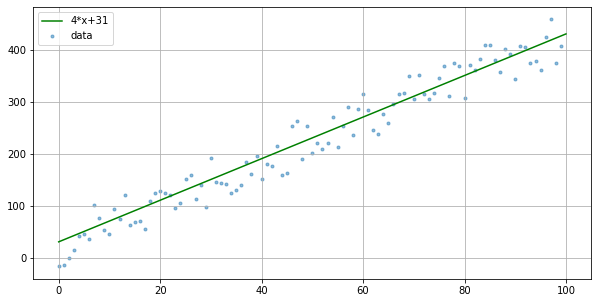

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train,marker='.',alpha=.5,label='data') 
plt.plot( np.array([0,n]), f(np.array([0,n])),'-g',label='%i*x+%i'%(a_train,b_train) ) 
plt.legend()
plt.grid()

In [6]:
# параметры, которые будем искать по данным
a = tf.Variable(np.random.rand(), trainable=True)
b = tf.Variable(np.random.rand(), trainable=True)

# модель регрессии
model = lambda x : a*x+b

# функция потери
loss = lambda real_y, pred_y: tf.reduce_mean( tf.abs(real_y - pred_y) )

In [7]:
# реализуем метод градиентного спуска

learning_rate = .01 # коэффициент скорости обучения
training_epochs = 10 # количество эпох обучения

loss_history = []  # история измениения ф-ции потер

# шаг процесса оптимизации 
def step( x_real, y_real ):
    with tf.GradientTape(persistent=True) as tape:
        # считаем потерю
        loss_value = loss(y_real, model(x_real))
    
    # значение градиента
    a_gradients, b_gradients = tape.gradient(loss_value, (a, b))

    # изменяем параметры
    a.assign_sub(a_gradients * learning_rate)
    b.assign_sub(b_gradients * learning_rate)
    
    # обновляем историю значений ф-ции потери 
    loss_history.append(loss_value.numpy())

# основной цикл обучения
for _ in range(training_epochs): step(x_train, y_train)

In [8]:
# что получили
print(f'y ≈ {a.numpy()} * x + {b.numpy()}')

y ≈ 4.414299964904785 * x + 0.5483855605125427


In [9]:
# что должно быть
print(f'y ≈ {a_train} * x + {b_train}')

y ≈ 4.0 * x + 31.0


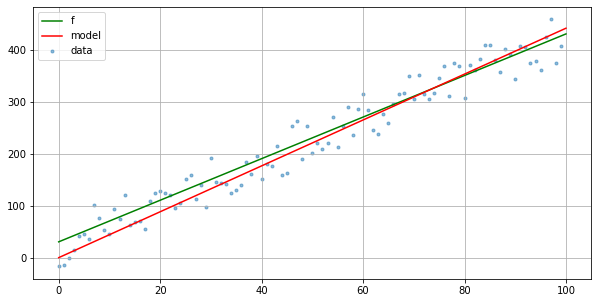

In [10]:
plt.figure(figsize=(10,5))
plt.scatter(x_train,y_train,marker='.',alpha=.5,label='data') 
plt.plot( np.array([0,n]), f(np.array([0,n])),'-g',label='f' ) 
plt.plot( np.array([0,n]), model(np.array([0,n])),'-r',label='model' ) 
plt.legend()
plt.grid()

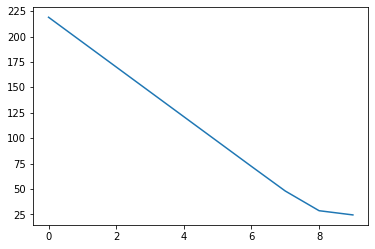

In [11]:
# история изменения ф-ции потери
plt.plot(loss_history) 